In [20]:
#Question 1
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [21]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_test.csv')
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [4]:
df.head(15)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
5,16013,32,management,single,tertiary,no,0,yes,no,cellular,22,jul,455,2,-1,0,unknown
6,196,33,blue-collar,single,secondary,no,307,yes,no,unknown,5,may,309,2,-1,0,unknown
7,8516,37,management,married,secondary,no,341,no,no,unknown,3,jun,120,2,-1,0,unknown
8,31208,36,technician,divorced,tertiary,no,1381,no,no,cellular,2,mar,149,1,-1,0,unknown
9,38462,50,admin.,single,primary,no,181,yes,no,cellular,15,may,119,4,372,3,failure


In [5]:
df.shape

(13564, 17)

In [6]:
df.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

There are two types of data are present in the dataset(int64,object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


<Axes: >

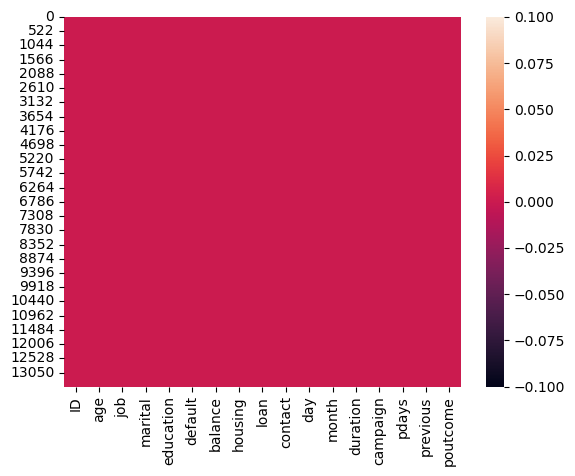

In [8]:
sns.heatmap(df.isnull())

Summary Statistics

In [9]:
df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000
mean,22704.057726,40.887128,1358.496535,15.738646,258.278679,2.759510,41.648555,0.594441
std,12994.043329,10.604108,3082.940623,8.288174,258.488648,3.060928,101.985178,1.998193
min,1.000000,18.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11546.000000,33.000000,71.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,22782.000000,39.000000,445.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33974.250000,48.000000,1413.250000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45206.000000,95.000000,98417.000000,31.000000,3253.000000,58.000000,850.000000,55.000000


High standard deviation present in id,balance,duration mean data isspreadd too much.In id,balance mean is grater than median.It means
the variables has right skewed data large gap between 75th percentile and max in 75th percentile , hence outliers are present

In [10]:
df.skew()

ID         -0.013625
age         0.692404
balance     9.165015
day         0.106806
duration    3.017221
campaign    4.958236
pdays       2.555601
previous    8.704583
dtype: float64

<Axes: >

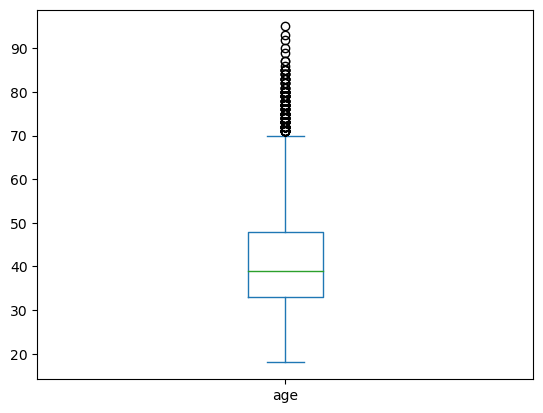

In [12]:
df['age'].plot.box()

ID             Axes(0.125,0.53;0.0945122x0.35)
age         Axes(0.238415,0.53;0.0945122x0.35)
balance     Axes(0.351829,0.53;0.0945122x0.35)
day         Axes(0.465244,0.53;0.0945122x0.35)
duration    Axes(0.578659,0.53;0.0945122x0.35)
campaign    Axes(0.692073,0.53;0.0945122x0.35)
pdays       Axes(0.805488,0.53;0.0945122x0.35)
previous       Axes(0.125,0.11;0.0945122x0.35)
dtype: object

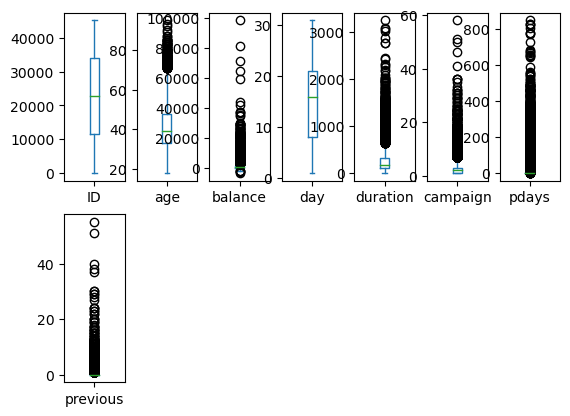

In [13]:
df.plot(kind='box',subplots=True, layout=( 2,7))

<Axes: ylabel='Frequency'>

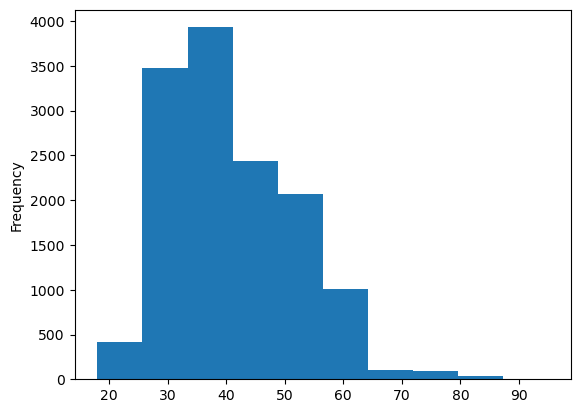

In [16]:
df['age'].plot.hist()

<function matplotlib.pyplot.show(close=None, block=None)>

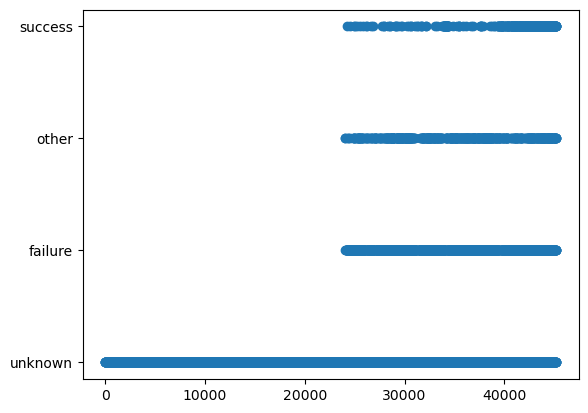

In [17]:
plt.scatter(df['ID'],df['poutcome'])
plt.show

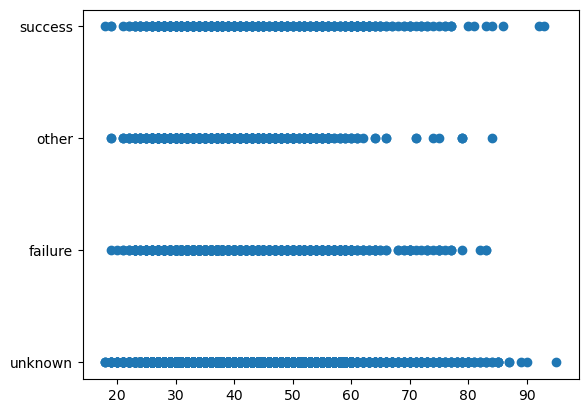

In [18]:
plt.scatter(df['age'],df['poutcome'])

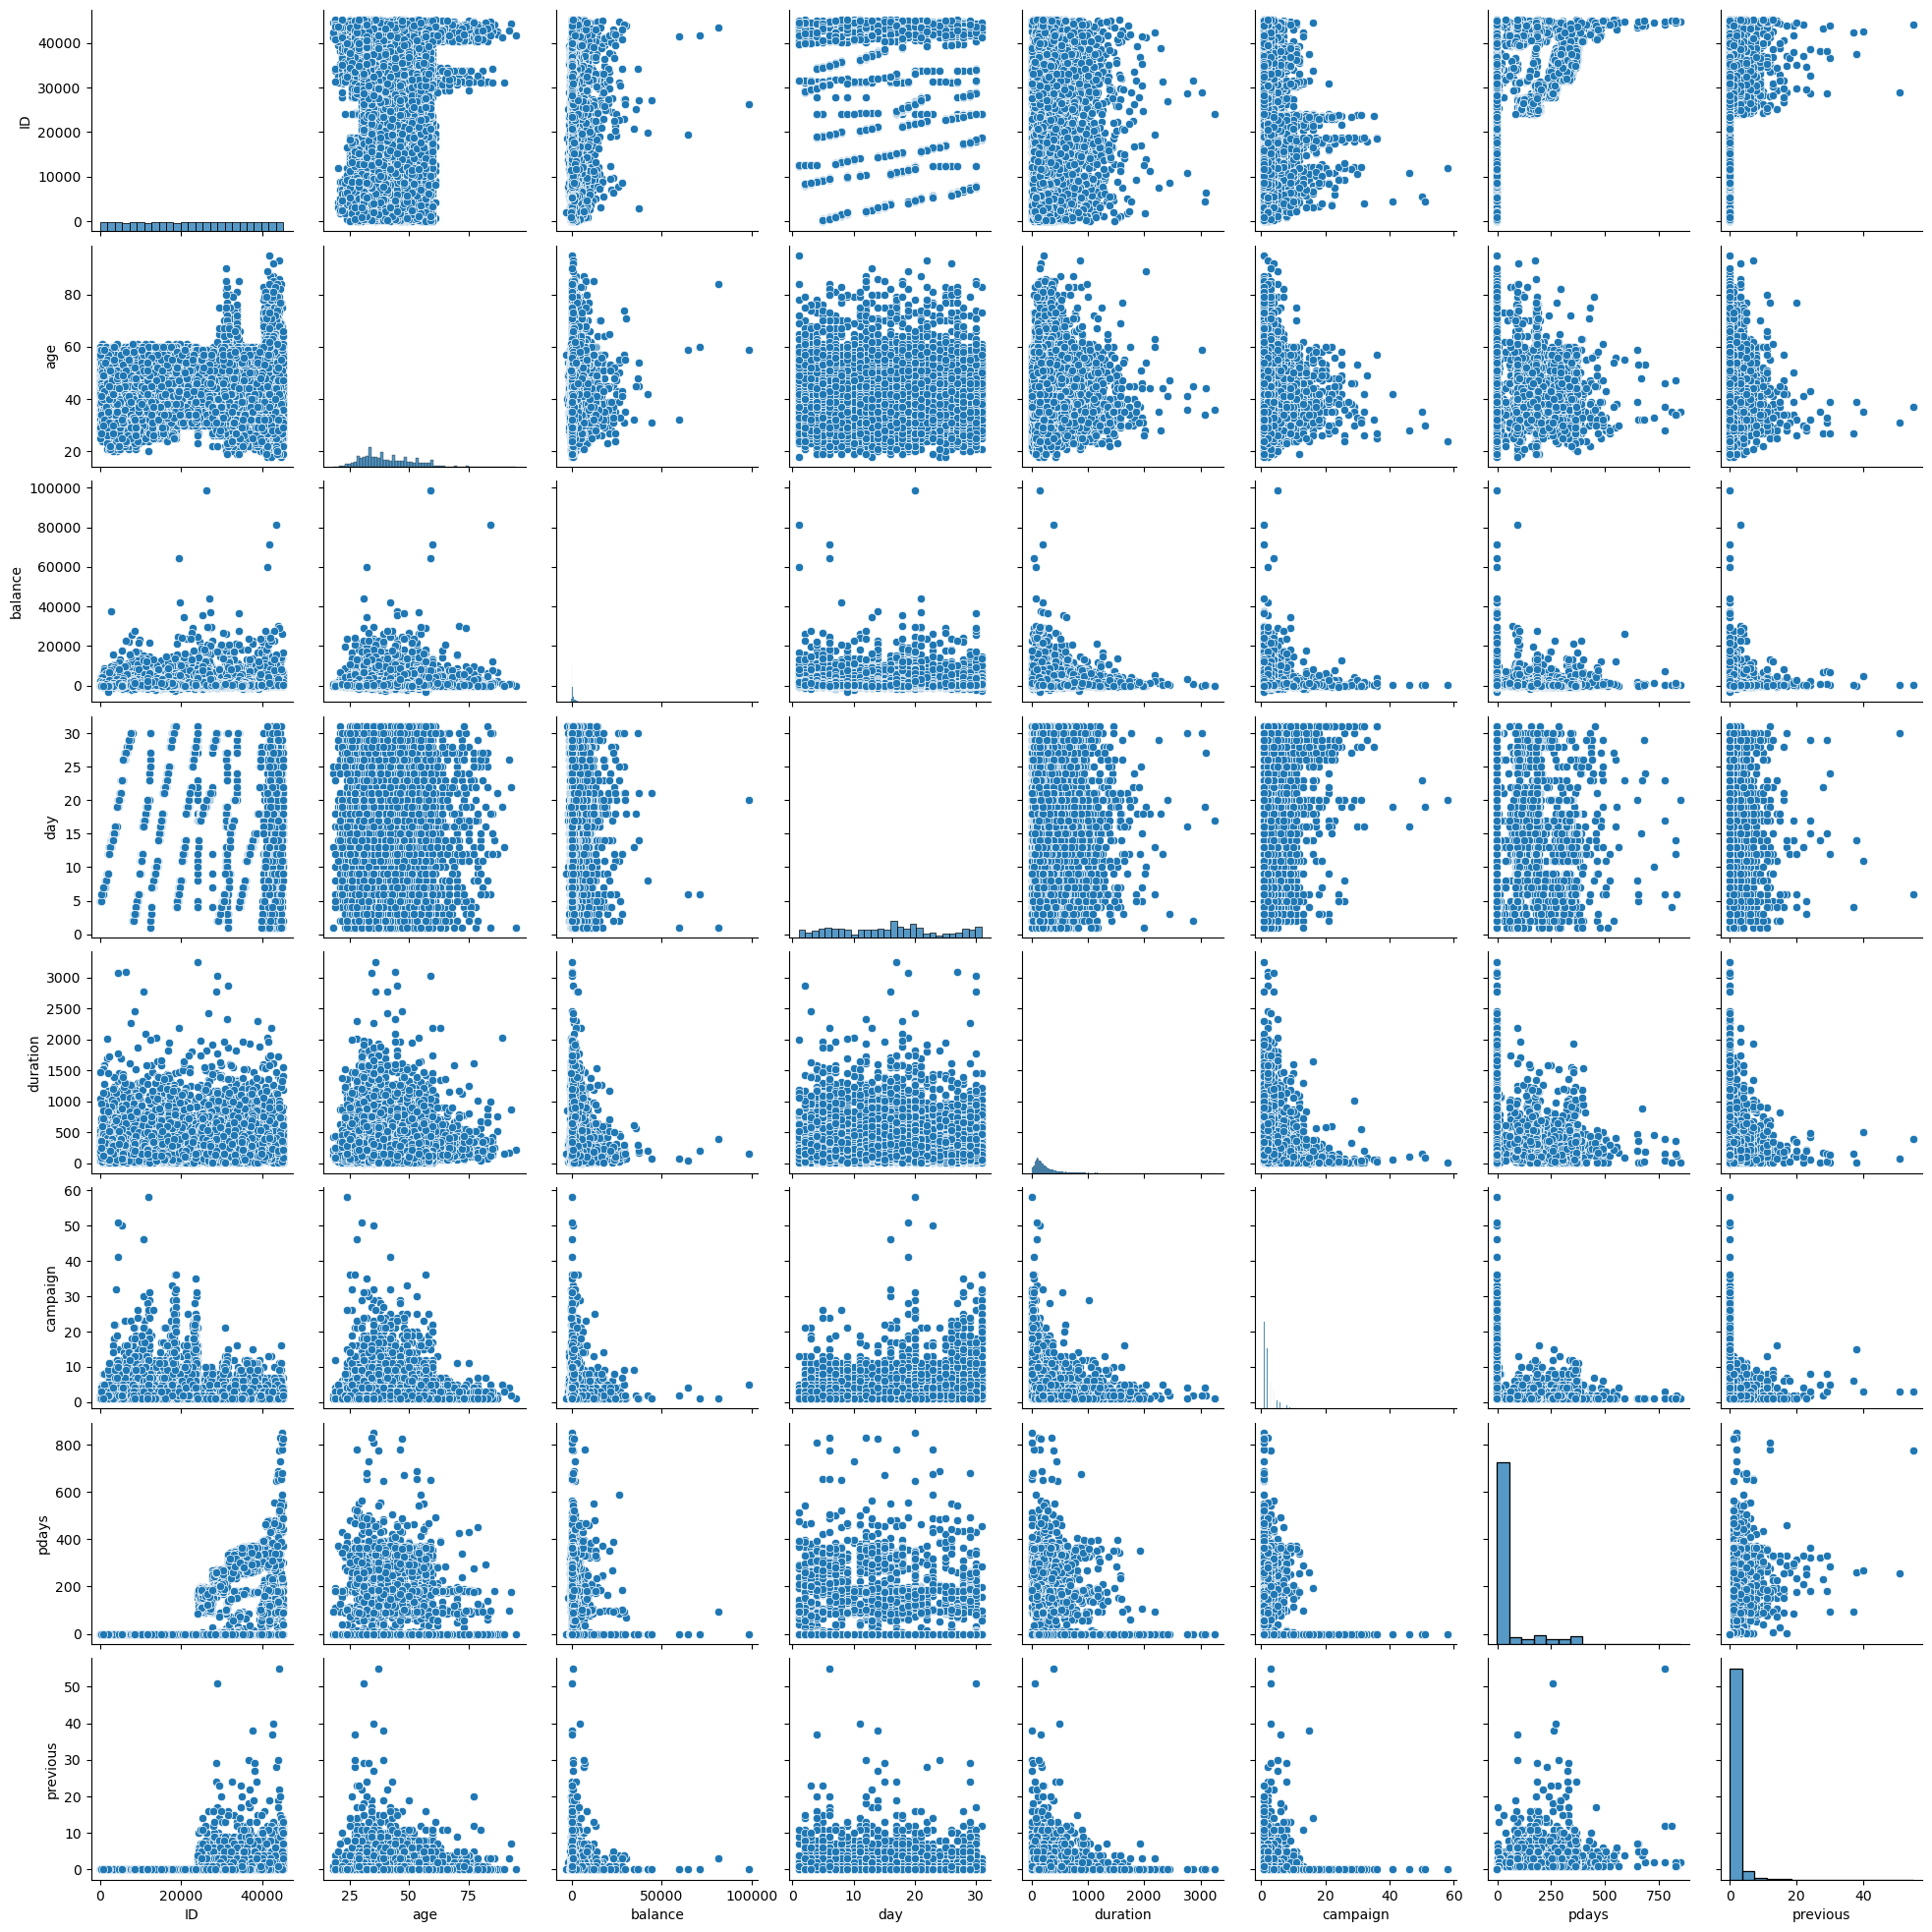

In [19]:
sns.pairplot(df)

Its showing all the input variables and their outputs whether they are skewed, positively or negatively coorelated.

<function matplotlib.pyplot.show(close=None, block=None)>

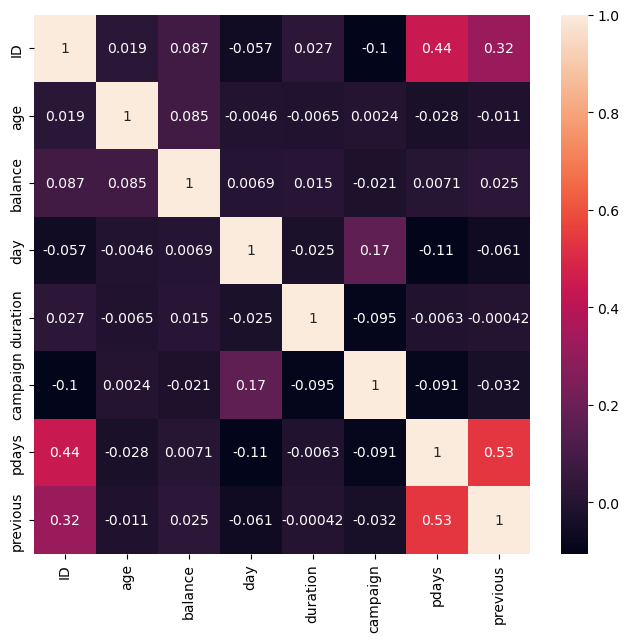

In [20]:
corr_hmap=df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show

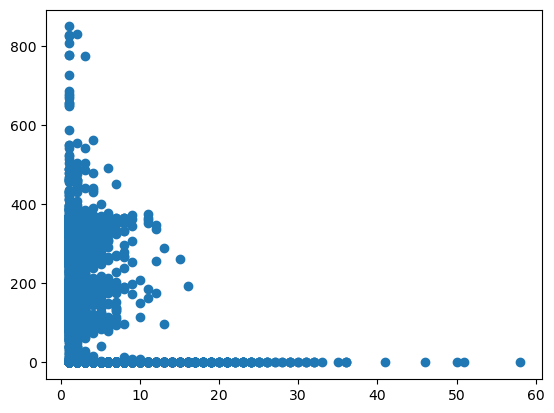

In [4]:
plt.scatter(df['campaign'],df['pdays'])
plt.show()

In [5]:
x=df.iloc[:,0:-1]
x.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0


In [6]:
y=df.iloc[:,-1]
y.head()

0    unknown
1    unknown
2    unknown
3    unknown
4    unknown
Name: poutcome, dtype: object

In [7]:
x.shape

(13564, 16)

In [8]:
y.shape

(13564,)